In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

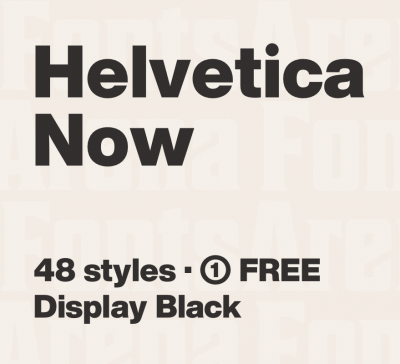

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

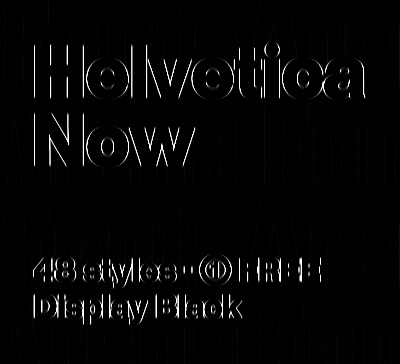

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,2,-1],[-1,2,-1],[-1,2,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

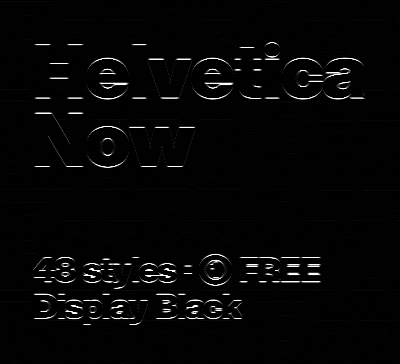

In [0]:
"""
Horizontal edge detector : 

In order to design the horizontal edge detector, we need to amplify values in the middle horizontal row and other values should be deamplified since we only want it
to detect a horizontal edge. If we update other values, it will also make vertical edge combination with horizontal edge.
so,

[
-1 -1 -1
 2  2  2
-1 -1 -1
]

"""

kernel = np.float32([[-1,-1,-1],[2,2,2],[-1,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


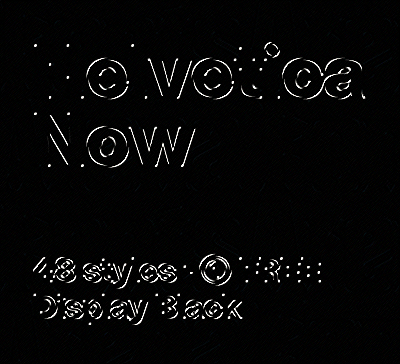

In [0]:
"""
45 degree edge detector : 

In order to design the 45 degree edge detector, we need to amplify the diagonal values and deamplify the other values.
so, something like

[
-2 -2  4
-2  4 -2
 4 -2 -2
]

would produce 45 degrees to left.
"""

kernel = np.float32([[-2,-2,4],[-2,4,-2],[4,-2,-2]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


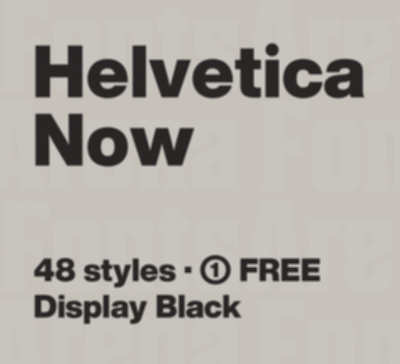

In [0]:
"""
Blur kernel : 

In order to design a blur kernel, we need to divide the pixels of the image. So we use a kernel that divides each value by some factor as it convolves over the image.
So it will simply reduce the pixel values.

[
1/11  1/11  1/11
1/11  1/11  1/11
1/11  1/11  1/11
]

Blur effect is also sometimes called as averaging neighbours.

"""

kernel = np.float32([[1/11,1/11,1/11],[1/11,1/11,1/11],[1/11,1/11,1/11]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


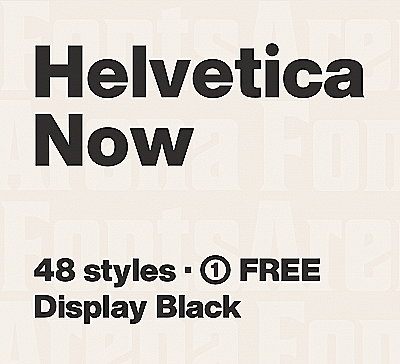

In [0]:
"""
Sharpening kernel : 

In order to design a Sharpening kernel, we need to highlight the pixels of the image. So we use a kernel that emphasis differences in adjacent pixels as it convolves 
over the image. So it will simply amplify the middle pixel and deamplify the neighbouring pixel values.

[
 0 -1  0
-1  5 -1
 0 -1  0
]


"""

kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)
